# **Lab 3: Spark SQL and DataFrame**

Lecturer: `Sirasit Lochanachit`


Course: `06026213 Big Data Systems`

Term: `02/2024`

Lab materials prepared by `Titipa Eamsiriwong (TA)`

**OBJECTIVES** : เรียนรู้การทำงานกับ Apache Spark SQL
*   การสร้าง DataFrames (Creating DataFrames)
*   การแปลง RDD เป็น DataFrame (Converting RDD to DataFrame)
*   การโหลดข้อมูลจากไฟล์ CSV (Loading CSV into DataFrame)
*   การ Query ข้อมูลด้วย SQL (Using SQL Queries with DataFrame)
*   การแสดงผลข้อมูลด้วย Visualization (Data Visualization)

# What is a PySpark DataFrame API?

- เป็นโครงสร้างข้อมูลของ Spark ในระดับสูงที่สร้างภาพจำลอง (abstraction) ของ
ข้อมูลให้อยู่ในรูปแบบของตารางที่มีคอลัมน์และแถว

- มี API ที่ทำให้การจัดการและประมวลผลข้อมูลในรูปแบบของตารางนั้นทำได้ง่าย เช่น
  - การดึงและคำนวณกับข้อมูลทั้งคอลัมน์ของตาราง
  - การประมวลผลข้อมูลทั้งคอลัมน์
  - การกรองและเรียงลำดับแถวตามค่าในคอลัมน์
  - การแยกตารางย่อย
• ภาษาโปรแกรมทั้ง 4 + 1  (Scala, Java, Python, R, สามารถใช้ DataFrame API นี้ได้


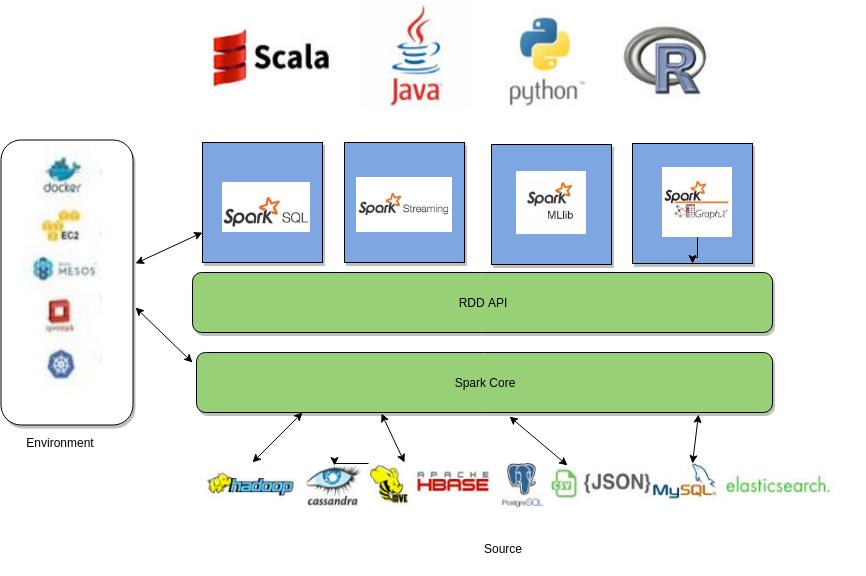

## Datasets and DataFrames


---
## **ENVIRONMENT SETUP**

> คำสั่ง `warnings.filterwarnings("ignore")` ใช้ในการปิดการแสดงผลคำเตือน (Warnings) ใน Python ที่ไม่เกี่ยวข้องในการทำงานหลักของโปรแกรม



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pyspark

---

# Starting Point: SparkSession

In [3]:
from pyspark.sql import SparkSession
from datetime import date, datetime

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
spark.version

'3.5.4'

---
## **STEP 1 : Creating a PySpark DataFrame**

### **1.1 Create a PySpark DataFrame from a list**

In [41]:
# Example data
data = [
          ("Clarke", "Griffin", 25, date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
          ("Bellamy", "Blake", 29, date(1995, 2, 1), datetime(1995, 1, 2, 12, 0)),
          ("Raven", "Reyes", 24, date(2001, 3, 1), datetime(2001, 1, 3, 12, 0)),
          ("John", "Murphy", 23, date(2002, 4, 1), datetime(2002, 1, 4, 12, 0))
       ]
columns = ["First Name", "Last Name", "Age", "Date of Birth", "Date Recorded"]

In [8]:
df1 = spark.createDataFrame(data, columns)
df1

DataFrame[First Name: string, Last Name: string, Age: bigint, Date of Birth: date, Date Recorded: timestamp]

In [9]:
type(df1)

pyspark.sql.dataframe.DataFrame

**การกำหนด schema**

- มีวิธีกำหนด schema ได้หลายแบบ ในที่นี้จะอธิบายการใช้ DDL (Data Definition Language หรือ Data Description Language)

- ระบุ schema ด้วย DDL โดยระบุชื่อ column ตามด้วย
data type (ประเภทข้อมูล) คั่นแต่ละคอลัมน์ด้วย comma (,)

In [15]:
# Alternative - with an explicit schema
schema = 'First_Name string, Last_Name string, Age long, Date_of_Birth date, Date_Recorded timestamp'

use timestamp instead datetime.

In [14]:
df1 = spark.createDataFrame(data, columns, schema)
df1

DataFrame[First Name: string, Last Name: string, Age: bigint, Date of Birth: date, Date Recorded: timestamp]

In [ ]:
# another method for define schema of dataframe
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Define the schema for the data frame
schema = StructType([
        StructField('First Name', StringType(), True),
        StructField('Last Name', StringType(), True),
        StructField('Age', StringType(), True),
        StructField('Date of Birth', IntegerType(),True),
        StructField('Date Recorded', IntegerType(), True)
         ])

# # Applying custom schema to data frame
# df = spark.read.format("csv").schema(
#         schema).option("header",
#         True).load("/content/student_data.csv")

---

In [16]:
# Alternative - Create from a pandas DF
data_dict = {
    'First Name': ["Clarke", "Bellamy", "Raven", "John"],
    'Last Name': ["Griffin", "Blake", "Reyes", "Murphy"],
    'Age' : [25, 29, 24, 23],
    'Date of Birth': [date(2000, 1, 1), date(1995, 2, 1), date(2001, 3, 1), date(2002, 4, 1)],
    'Date Recorded': [datetime(2000, 1, 1, 12, 0), datetime(1995, 1, 2, 12, 0), datetime(2001, 1, 3, 12, 0), datetime(2002, 1, 4, 12, 0)]
    }
type(data_dict)

dict

In [19]:
import pandas as pd

pandas_df = pd.DataFrame(data_dict)
pandas_df

,First Name,Last Name,Age,Date of Birth,Date Recorded
0,Clarke,Griffin,25,2000-01-01,2000-01-01 12:00:00
1,Bellamy,Blake,29,1995-02-01,1995-01-02 12:00:00
2,Raven,Reyes,24,2001-03-01,2001-01-03 12:00:00
3,John,Murphy,23,2002-04-01,2002-01-04 12:00:00


In [20]:
type(pandas_df)

pandas.core.frame.DataFrame

In [21]:
df1_alter = spark.createDataFrame(pandas_df)
df1_alter

DataFrame[First Name: string, Last Name: string, Age: bigint, Date of Birth: date, Date Recorded: timestamp]

In [22]:
type(df1_alter)

pyspark.sql.dataframe.DataFrame

### **1.2 Viewing Data**

.show() คล้ายๆกับ .head() แต่แสดงเป็น dataframe

In [26]:
df1.head(5)

[Row(First Name='Clarke', Last Name='Griffin', Age=25, Date of Birth=datetime.date(2000, 1, 1), Date Recorded=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(First Name='Bellamy', Last Name='Blake', Age=29, Date of Birth=datetime.date(1995, 2, 1), Date Recorded=datetime.datetime(1995, 1, 2, 12, 0)),
 Row(First Name='Raven', Last Name='Reyes', Age=24, Date of Birth=datetime.date(2001, 3, 1), Date Recorded=datetime.datetime(2001, 1, 3, 12, 0)),
 Row(First Name='John', Last Name='Murphy', Age=23, Date of Birth=datetime.date(2002, 4, 1), Date Recorded=datetime.datetime(2002, 1, 4, 12, 0))]

In [23]:
df1.show()

+----------+---------+---+-------------+-------------------+
|First Name|Last Name|Age|Date of Birth|      Date Recorded|
+----------+---------+---+-------------+-------------------+
|    Clarke|  Griffin| 25|   2000-01-01|2000-01-01 12:00:00|
|   Bellamy|    Blake| 29|   1995-02-01|1995-01-02 12:00:00|
|     Raven|    Reyes| 24|   2001-03-01|2001-01-03 12:00:00|
|      John|   Murphy| 23|   2002-04-01|2002-01-04 12:00:00|
+----------+---------+---+-------------+-------------------+



In [24]:
df1.show(2)

+----------+---------+---+-------------+-------------------+
|First Name|Last Name|Age|Date of Birth|      Date Recorded|
+----------+---------+---+-------------+-------------------+
|    Clarke|  Griffin| 25|   2000-01-01|2000-01-01 12:00:00|
|   Bellamy|    Blake| 29|   1995-02-01|1995-01-02 12:00:00|
+----------+---------+---+-------------+-------------------+
only showing top 2 rows



### **1.3 Show the basic stats of the DataFrame**

In [27]:
df1.describe()

DataFrame[summary: string, First Name: string, Last Name: string, Age: string]

In [28]:
df1.describe().show()

+-------+----------+---------+------------------+
|summary|First Name|Last Name|               Age|
+-------+----------+---------+------------------+
|  count|         4|        4|                 4|
|   mean|      NULL|     NULL|             25.25|
| stddev|      NULL|     NULL|2.6299556396765835|
|    min|   Bellamy|    Blake|                23|
|    max|     Raven|    Reyes|                29|
+-------+----------+---------+------------------+



In [29]:
df1.printSchema()

root
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Date of Birth: date (nullable = true)
 |-- Date Recorded: timestamp (nullable = true)



In [33]:
type(df1.printSchema())

root
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Date of Birth: date (nullable = true)
 |-- Date Recorded: timestamp (nullable = true)



NoneType

.printSchema() ไม่ใช่ action function

### **1.4 Information about DataFrame**

In [31]:
df1.columns

['First Name', 'Last Name', 'Age', 'Date of Birth', 'Date Recorded']

In [32]:
df1.shape

AttributeError: 'DataFrame' object has no attribute 'shape'

ใช้ .shape() ไม่ได้

Count number of columns

In [34]:
len(df1.columns)

5

Count number of rows

In [35]:
df1.count()

4

In [36]:
print((df1.count(), len(df1.columns)))

(4, 5)


### **1.5 Convert PySpark DataFrame back to pandas DataFrame**

In [37]:
df1.toPandas()

,First Name,Last Name,Age,Date of Birth,Date Recorded
0,Clarke,Griffin,25,2000-01-01,2000-01-01 12:00:00
1,Bellamy,Blake,29,1995-02-01,1995-01-02 12:00:00
2,Raven,Reyes,24,2001-03-01,2001-01-03 12:00:00
3,John,Murphy,23,2002-04-01,2002-01-04 12:00:00


In [38]:
type(df1)

pyspark.sql.dataframe.DataFrame

In [39]:
type(df1.toPandas())

pandas.core.frame.DataFrame

---
## **STEP 2 : Converting RDD to DataFrame**

In [40]:
rdd = spark.sparkContext.parallelize(data)
rdd

ParallelCollectionRDD[54] at readRDDFromFile at PythonRDD.scala:289

In [42]:
df2 = rdd.toDF()
df2

DataFrame[_1: string, _2: string, _3: bigint, _4: date, _5: timestamp]

In [43]:
df2.show()

+-------+-------+---+----------+-------------------+
|     _1|     _2| _3|        _4|                 _5|
+-------+-------+---+----------+-------------------+
| Clarke|Griffin| 25|2000-01-01|2000-01-01 12:00:00|
|Bellamy|  Blake| 29|1995-02-01|1995-01-02 12:00:00|
|  Raven|  Reyes| 24|2001-03-01|2001-01-03 12:00:00|
|   John| Murphy| 23|2002-04-01|2002-01-04 12:00:00|
+-------+-------+---+----------+-------------------+



ไม่ได้ใ่ชื่อ column เลยเป็นแบบนี้

In [44]:
df2 = rdd.toDF(columns)
df2

DataFrame[First Name: string, Last Name: string, Age: bigint, Date of Birth: date, Date Recorded: timestamp]

In [45]:
df2.show()

+----------+---------+---+-------------+-------------------+
|First Name|Last Name|Age|Date of Birth|      Date Recorded|
+----------+---------+---+-------------+-------------------+
|    Clarke|  Griffin| 25|   2000-01-01|2000-01-01 12:00:00|
|   Bellamy|    Blake| 29|   1995-02-01|1995-01-02 12:00:00|
|     Raven|    Reyes| 24|   2001-03-01|2001-01-03 12:00:00|
|      John|   Murphy| 23|   2002-04-01|2002-01-04 12:00:00|
+----------+---------+---+-------------+-------------------+



---
## **STEP 3 : Loading CSV into DataFrame**

Spark สามารถสร้าง DataFrame ได้โดยการอ่านข้อมูลเข้าจากไฟล์ Spark
- มีคำสั่งที่ใช้ในการสกัดข้อมูลออกจากไฟล์หลายประเภท เช่น csv, JSON, parquet เป็นต้น
- คำสั่งที่ใช้ในการอ่านไฟล์จะอยู่ใน `SparkSession.read`
- กำหนด option `header=True` เพื่อใช้แถวแรกเป็นชื่อ column
- หากไม่ได้กำหนด option `schema` spark จะคาดเดา data type (ประเภทข้อมูล) ของแต่ละ column เอง

ให้นักศึกษาดาวน์โหลดไฟล์หรือ Add shortcut to Drive แล้วบันทึกลงบน My Drive ของบัญชีที่เชื่อมต่อกับ Google Colab Notebook ปัจจุบัน

> Dataset เกี่ยวกับอุบัติเหตุที่เกิดขึ้นในช่วงเทศกาลปีใหม่ ตั้งแต่ปี 2551 - 2558 ในแต่ละจังหวัดของประเทศไทย: [accidents.csv](https://drive.google.com/file/d/1H5Q0bTVnNBpE3AEeFW_057wOpRI-gDFy/view?usp=sharing)




Mount Folder ใน Google Drive

In [46]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [47]:
path = "/content/drive/MyDrive/bigDataSystems/accidents.csv"

In [48]:
df3 = spark.read.csv(path, header=True)
df3

DataFrame[ชื่อเทศกาล: string, รหัสจังหวัด: string, จังหวัด: string, รหัส รพ.: string, ชื่อโรงพยาบาลที่รับผู้บาดเจ็บ: string, วันที่เกิดเหตุ: string, เวลาเกิดเหตุ: string, เพศ: string, อายุ: string, ถนนที่เกิดเหตุ: string, สถานะ: string, รถผู้บาดเจ็บ: string, รถคู่กรณี: string, มาตรการ: string, การดื่มสุรา: string, การนำส่ง: string, Refer-Admit: string, ผลการรักษา: string, จำนวนวันรักษา: string]

show() is an action function

In [49]:
df3.show(3)

+----------+-----------+-------------+--------+-----------------------------+--------------+--------------+----+----+--------------+---------+--------------+------------+-------+-----------+-----------------+-----------+----------+-------------+
|ชื่อเทศกาล|รหัสจังหวัด|      จังหวัด|รหัส รพ.|ชื่อโรงพยาบาลที่รับผู้บาดเจ็บ|วันที่เกิดเหตุ|  เวลาเกิดเหตุ| เพศ|อายุ|ถนนที่เกิดเหตุ|    สถานะ|  รถผู้บาดเจ็บ|   รถคู่กรณี|มาตรการ|การดื่มสุรา|         การนำส่ง|Refer-Admit|ผลการรักษา|จำนวนวันรักษา|
+----------+-----------+-------------+--------+-----------------------------+--------------+--------------+----+----+--------------+---------+--------------+------------+-------+-----------+-----------------+-----------+----------+-------------+
| ปีใหม่ 51|         10|กรุงเทพมหานคร|   11630|                      กรุงเทพ|             3|12:01-13:00 น.|หญิง|  54|       ในเมือง|ผู้ชับขี่|รถเก๋ง/แท็กซี่|ไม่มี/ล้มเอง|เข็มขัด|    ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|        ไม่| ทุเลา/หาย|            0|
| ปีใหม่ 51|    

In [50]:
df3.printSchema()

root
 |-- ชื่อเทศกาล: string (nullable = true)
 |-- รหัสจังหวัด: string (nullable = true)
 |-- จังหวัด: string (nullable = true)
 |-- รหัส รพ.: string (nullable = true)
 |-- ชื่อโรงพยาบาลที่รับผู้บาดเจ็บ: string (nullable = true)
 |-- วันที่เกิดเหตุ: string (nullable = true)
 |-- เวลาเกิดเหตุ: string (nullable = true)
 |-- เพศ: string (nullable = true)
 |-- อายุ: string (nullable = true)
 |-- ถนนที่เกิดเหตุ: string (nullable = true)
 |-- สถานะ: string (nullable = true)
 |-- รถผู้บาดเจ็บ: string (nullable = true)
 |-- รถคู่กรณี: string (nullable = true)
 |-- มาตรการ: string (nullable = true)
 |-- การดื่มสุรา: string (nullable = true)
 |-- การนำส่ง: string (nullable = true)
 |-- Refer-Admit: string (nullable = true)
 |-- ผลการรักษา: string (nullable = true)
 |-- จำนวนวันรักษา: string (nullable = true)



กำหนด schema โดยระบุชื่อ Column และ Data Type

In [52]:
schema = "year STRING, prov_id STRING, prov STRING, hospital_id STRING,\
          hospital STRING,  day STRING, time STRING, sex STRING,\
          age INT, road STRING, role STRING, own_car STRING, other_car STRING,\
          safety STRING, alcohol STRING, delivery STRING, admit STRING,\
          result STRING, duration INT"

In [53]:
df3 = spark.read.csv(path, header=True,schema=schema)
df3

DataFrame[year: string, prov_id: string, prov: string, hospital_id: string, hospital: string, day: string, time: string, sex: string, age: int, road: string, role: string, own_car: string, other_car: string, safety: string, alcohol: string, delivery: string, admit: string, result: string, duration: int]

In [55]:
df3.show(3)

+---------+-------+-------------+-----------+----------------+---+--------------+----+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|        hospital|day|          time| sex|age|   road|     role|       own_car|   other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+----------------+---+--------------+----+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11630|         กรุงเทพ|  3|12:01-13:00 น.|หญิง| 54|ในเมือง|ผู้ชับขี่|รถเก๋ง/แท็กซี่|ไม่มี/ล้มเอง|เข็มขัด|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11548|กรุงเทพคริสเตียน|  2|21:01-22:00 น.|หญิง| 13|ในเมือง|ผู้ชับขี่|   จักรยานยนต์|       รถตู้|ใส่หมวก|ไม่ดื่ม|มูลนิธิ/อาสาสมัคร|admit|ทุเลา/หาย|       0|
|ปีใหม่ 51|     10|ก

In [57]:
df3.printSchema()

root
 |-- year: string (nullable = true)
 |-- prov_id: string (nullable = true)
 |-- prov: string (nullable = true)
 |-- hospital_id: string (nullable = true)
 |-- hospital: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- road: string (nullable = true)
 |-- role: string (nullable = true)
 |-- own_car: string (nullable = true)
 |-- other_car: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- alcohol: string (nullable = true)
 |-- delivery: string (nullable = true)
 |-- admit: string (nullable = true)
 |-- result: string (nullable = true)
 |-- duration: integer (nullable = true)



ไม่ได้กำหนด Schema และให้ Spark คาดเดา Data Type เอง

In [56]:
df3_test = spark.read.csv(path, sep=",", inferSchema=True, header=True)
df3_test.printSchema()

root
 |-- ชื่อเทศกาล: string (nullable = true)
 |-- รหัสจังหวัด: integer (nullable = true)
 |-- จังหวัด: string (nullable = true)
 |-- รหัส รพ.: integer (nullable = true)
 |-- ชื่อโรงพยาบาลที่รับผู้บาดเจ็บ: string (nullable = true)
 |-- วันที่เกิดเหตุ: integer (nullable = true)
 |-- เวลาเกิดเหตุ: string (nullable = true)
 |-- เพศ: string (nullable = true)
 |-- อายุ: integer (nullable = true)
 |-- ถนนที่เกิดเหตุ: string (nullable = true)
 |-- สถานะ: string (nullable = true)
 |-- รถผู้บาดเจ็บ: string (nullable = true)
 |-- รถคู่กรณี: string (nullable = true)
 |-- มาตรการ: string (nullable = true)
 |-- การดื่มสุรา: string (nullable = true)
 |-- การนำส่ง: string (nullable = true)
 |-- Refer-Admit: string (nullable = true)
 |-- ผลการรักษา: string (nullable = true)
 |-- จำนวนวันรักษา: integer (nullable = true)



กำหนด Schema

CSV คือใช้งานง่ายที่สุด

แต่มี Dataset ประเภทอื่นที่ Spark SQL/DataFrame API support ซึ่ง read & write ได้ efficient และเก็บข้อมูลได้ compact พื้นที่มากกว่า

1. Parquet เก็บข้อมูลตาม column
- เป็น Default data source ของ `spark.read.load` function
- เป็น file format ที่เป็น Open-source ใน Apache Hadoop ecosystem
- มีการบีบอัดข้อมูล เพื่อประหยัดพื้นที่
- เก็บ schema ของตารางไว้ใน file
- เหมาะสำหรับการเก็บและวิเคราะห์ข้อมูลขนาดใหญ่
- พัฒนาโดย Twitter และ Cloudera (Data lake software company)

Save DataFrames เป็น Parquet file ที่มีข้อมูล schema

In [58]:
df3.write.parquet("accidents.parquet")

Read Parquet file

In [59]:
spark.read.parquet("accidents.parquet").show(3)

+---------+-------+-------------+-----------+----------------+---+--------------+----+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|        hospital|day|          time| sex|age|   road|     role|       own_car|   other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+----------------+---+--------------+----+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11630|         กรุงเทพ|  3|12:01-13:00 น.|หญิง| 54|ในเมือง|ผู้ชับขี่|รถเก๋ง/แท็กซี่|ไม่มี/ล้มเอง|เข็มขัด|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11548|กรุงเทพคริสเตียน|  2|21:01-22:00 น.|หญิง| 13|ในเมือง|ผู้ชับขี่|   จักรยานยนต์|       รถตู้|ใส่หมวก|ไม่ดื่ม|มูลนิธิ/อาสาสมัคร|admit|ทุเลา/หาย|       0|
|ปีใหม่ 51|     10|ก

2. ORC (Optimized Row Columnar) เก็บข้อมูลตาม column
- คล้ายกับ parquet
- เป็น file format ที่เป็น Open-source ใน Apache Hadoop ecosystem
- มีการบีบอัดและเข้ารหัสข้อมูล
- พัฒนาโดย Facebook และ Hortonworks (Data Software company)


Save DataFrames เป็น ORC file ที่มีข้อมูล schema

In [60]:
df3.write.orc("accidents.orc")

Read ORC file

In [61]:
spark.read.orc("accidents.orc").show(3)

+---------+-------+-------------+-----------+----------------+---+--------------+----+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|        hospital|day|          time| sex|age|   road|     role|       own_car|   other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+----------------+---+--------------+----+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11630|         กรุงเทพ|  3|12:01-13:00 น.|หญิง| 54|ในเมือง|ผู้ชับขี่|รถเก๋ง/แท็กซี่|ไม่มี/ล้มเอง|เข็มขัด|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11548|กรุงเทพคริสเตียน|  2|21:01-22:00 น.|หญิง| 13|ในเมือง|ผู้ชับขี่|   จักรยานยนต์|       รถตู้|ใส่หมวก|ไม่ดื่ม|มูลนิธิ/อาสาสมัคร|admit|ทุเลา/หาย|       0|
|ปีใหม่ 51|     10|ก

ทั้ง file parquet, orc จะถูกอ่านปล้วแปลงกลับมาเป็น pyspark

3. Avro

- เป็น row-based serialized format
  - ฝัง schema ใน data file
  - Data -> Serialization -> Avro -> Deserialization -> Data
- มี schema เป็น JSON และเก็บข้อมูลเป็น binary format เพื่อประหยัดพื้นที่
- เป็น file format ที่เป็น Open-source ใน Apache Hadoop ecosystem

---
## **STEP 4 : Using SQL Queries with DataFrame**

### **4.1 Register DataFrame as Temp Table**

> `createOrReplaceTempView` ใช้เพื่อสร้าง Temporary View จาก DataFrame สามารถใช้ในการรัน SQL Queries ผ่าน Spark SQL API ได้โดยตรงโดยไม่ต้องสร้าง DataFrame ใหม่ ซึ่ง View นี้จะอยู่ในหน่วยความจำชั่วคราวและจะหายไปเมื่อ Spark session สิ้นสุดลง



In [62]:
df3.createOrReplaceTempView("accidents")

### **4.2 Using DataFrame API**

In [63]:
import time, timeit

### **Select a Column**

Select only the "year" column

In [64]:
df3['year']

Column<'year'>

In [65]:
df3['year'].show()

TypeError: 'Column' object is not callable

In [66]:
df3[['year']]

DataFrame[year: string]

In [67]:
df3[['year']].show()

+---------+
|     year|
+---------+
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
+---------+
only showing top 20 rows



.select()  เป็น transformation function

In [68]:
df3.select("year")

DataFrame[year: string]

In [69]:
df3.select("year").show(5)

+---------+
|     year|
+---------+
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
|ปีใหม่ 51|
+---------+
only showing top 5 rows



### **Select Columns**



* Normal Selection



In [71]:
df3.select("road", "own_car", "other_car").show(5)

+-------+--------------+------------+
|   road|       own_car|   other_car|
+-------+--------------+------------+
|ในเมือง|รถเก๋ง/แท็กซี่|ไม่มี/ล้มเอง|
|ในเมือง|   จักรยานยนต์|       รถตู้|
|ในเมือง|   จักรยานยนต์|      ปิคอัพ|
|ในเมือง|   จักรยานยนต์|      ปิคอัพ|
|ในเมือง|   จักรยานยนต์|      ปิคอัพ|
+-------+--------------+------------+
only showing top 5 rows



In [ ]:
df3.select("road", "own_car", "other_car").collect()    # แปลงเป็น tuple Row

Comparison between using DataFrame API vs Spark SQL

In [72]:
# วัดระยะเวลาการประมวลผลการใช้ DataFrame API
df_time = timeit.timeit(stmt = 'df3.select("road", "own_car", "other_car").collect()', number=10, globals=globals())
print(f"Total time with DataFrame API on 10 times: {df_time:.4f} seconds")

Total time with DataFrame API on 10 times: 53.0616 seconds


In [73]:
# วัดระยะเวลาการประมวลผลการใช้ Spark SQL
sql_time = timeit.timeit(stmt = 'spark.sql("SELECT road, own_car, other_car FROM accidents").collect()', number=10, globals=globals())
# accidents คือชื่อ temporary view ที่เรากำหนด สามารถเรียกใช้ได้เลย

print(f"Total time with Spark SQL on 10 times: {sql_time:.4f} seconds")

Total time with Spark SQL on 10 times: 48.7572 seconds


### **Filter Rows**

แบบ pandas ใช้ `&` หรือ `|` ในการเชื่อม condition

สนใจผู้ประสบภัย อายุ<18 และปีที่เกิดอุบัติเหตุคือ 2558

In [74]:
df3[(df3["Age"] < 18) & (df3["year"] == "ปีใหม่ 58")].show(5)

+---------+-------+-------------+-----------+-----------------+---+--------------+----+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|         hospital|day|          time| sex|age|   road|      role|     own_car|     other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+-----------------+---+--------------+----+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 58|     10|กรุงเทพมหานคร|      11600|เซนหลุยส์ ยานนาวา|  4|04:01-05:00 น.| ชาย| 17|ในเมือง| ผู้ชับขี่| จักรยานยนต์|         อื่นๆ| ไม่ใส่|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 58|     10|กรุงเทพมหานคร|      11600|เซนหลุยส์ ยานนาวา| 31|22:01-23:00 น.| ชาย| 10|ในเมือง| ผู้โดยสาร| จักรยานยนต์|รถโดยสาร 4 ล้อ| ไม่ใส่|ไม่ดื่ม|มูลนิธิ/อาสาสมัคร|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 58

แบบ Spark SQL

In [80]:
spark.sql("SELECT * FROM accidents WHERE age < 18 and year == 'ปีใหม่ 58' LIMIT 5")

DataFrame[year: string, prov_id: string, prov: string, hospital_id: string, hospital: string, day: string, time: string, sex: string, age: int, road: string, role: string, own_car: string, other_car: string, safety: string, alcohol: string, delivery: string, admit: string, result: string, duration: int]

In [81]:
spark.sql("SELECT * FROM accidents WHERE age < 18 and year == 'ปีใหม่ 58' LIMIT 5").show()

+---------+-------+-------------+-----------+-----------------+---+--------------+----+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|         hospital|day|          time| sex|age|   road|      role|     own_car|     other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+-----------------+---+--------------+----+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 58|     10|กรุงเทพมหานคร|      11600|เซนหลุยส์ ยานนาวา|  4|04:01-05:00 น.| ชาย| 17|ในเมือง| ผู้ชับขี่| จักรยานยนต์|         อื่นๆ| ไม่ใส่|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 58|     10|กรุงเทพมหานคร|      11600|เซนหลุยส์ ยานนาวา| 31|22:01-23:00 น.| ชาย| 10|ในเมือง| ผู้โดยสาร| จักรยานยนต์|รถโดยสาร 4 ล้อ| ไม่ใส่|ไม่ดื่ม|มูลนิธิ/อาสาสมัคร|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 58

แบบ Mix

In [77]:
df3.where("age < 18 and year == 'ปีใหม่ 58'").show(5)

+---------+-------+-------------+-----------+-----------------+---+--------------+----+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|         hospital|day|          time| sex|age|   road|      role|     own_car|     other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+-----------------+---+--------------+----+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 58|     10|กรุงเทพมหานคร|      11600|เซนหลุยส์ ยานนาวา|  4|04:01-05:00 น.| ชาย| 17|ในเมือง| ผู้ชับขี่| จักรยานยนต์|         อื่นๆ| ไม่ใส่|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 58|     10|กรุงเทพมหานคร|      11600|เซนหลุยส์ ยานนาวา| 31|22:01-23:00 น.| ชาย| 10|ในเมือง| ผู้โดยสาร| จักรยานยนต์|รถโดยสาร 4 ล้อ| ไม่ใส่|ไม่ดื่ม|มูลนิธิ/อาสาสมัคร|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 58

แบบ function (เหมือน pandas)

In [78]:
df3.filter((df3["age"]<18) & (df3["year"]=='ปีใหม่ 58')).show(5)

+---------+-------+-------------+-----------+-----------------+---+--------------+----+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|         hospital|day|          time| sex|age|   road|      role|     own_car|     other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+-----------------+---+--------------+----+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 58|     10|กรุงเทพมหานคร|      11600|เซนหลุยส์ ยานนาวา|  4|04:01-05:00 น.| ชาย| 17|ในเมือง| ผู้ชับขี่| จักรยานยนต์|         อื่นๆ| ไม่ใส่|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 58|     10|กรุงเทพมหานคร|      11600|เซนหลุยส์ ยานนาวา| 31|22:01-23:00 น.| ชาย| 10|ในเมือง| ผู้โดยสาร| จักรยานยนต์|รถโดยสาร 4 ล้อ| ไม่ใส่|ไม่ดื่ม|มูลนิธิ/อาสาสมัคร|  ไม่|ทุเลา/หาย|       0|
|ปีใหม่ 58

Comparison between using DataFrame API vs Spark SQL

In [82]:
start = time.time()
temp_df = df3.filter(df3["duration"] > 0).collect()
diff = time.time() - start
print("DataFrame API Time:", diff)

start = time.time()
temp_sql = spark.sql("SELECT * FROM accidents WHERE duration > 0 LIMIT 5")
diff = time.time() - start
print("Spark SQL Time:", diff)

DataFrame API Time: 5.267314195632935
Spark SQL Time: 0.01712775230407715


### **Adding Columns**

ค่าในตารางไม่สามารถแก้ได้เพราะเป็น immutable จึงต้องสร้าง column ใหม่เท่านั้น
- สามารถใช้ select() คู่กับ when() ซึ่งอยู่ใน `pyspark.sql.functions`

หากต้องการเพิ่ม Column ที่ชื่อว่า accident_type โดยดูจากรถคู่กรณี ว่าเป็นอุบัติเหตุแบบใด เช่น ล้มเอง หรือไปชนอะไรบ้าง

ใช้ `withColumn()` ในการเพิ่ม column ใหม่เข้าไปในตาราง โดยระบุชื่อ
- จะไม่เปลี่ยน df เดิม (inplace=False) และจะทำการ return ตารางใหม่
- ข้อมูลใน Spark เป็น immutable (write once, read many)

> ฟังก์ชัน `when()` ใช้ในการสร้างเงื่อนไข (Conditional Logic) ภายใน DataFrame คล้ายกับการใช้ if-else ในภาษา Programming
  - รับ parameter 2 ตัวคือ condition ที่จะปรับ value และ value ที่จะใส่แทน
  - หากไม่เข้าเงื่อนไข โดย default จะเป็นค่า null
  - หากต้องการระบุค่าอื่นๆ ให้ใช้ otherwise() ต่อจาก when()
  - ใช้ when ต่อกันเพื่อกำหนด condition หลายอัน


In [83]:
from pyspark.sql.functions import when

In [84]:
df3 = df3.withColumn(
          "accident_type",
          when(df3["other_car"] == "ไม่มี/ล้มเอง", "ล้มเอง")
          .when(df3["other_car"] == "จักรยานยนต์", "ชนจักรยานยนต์")
          .when(df3["other_car"].like("%รถเก๋ง%"), "ชนรถยนต์")
          .when(df3["other_car"] == "คนเดินเท้า", "ชนคนเดินเท้า")
          .otherwise("ไม่ทราบ")
      )

accident_type คือชื่อคอลัมน์ใหม่ที่ถูกสร้างขึ้น และมี value ทุกแถว จึงมี nullable = false

In [85]:
df3.printSchema()

root
 |-- year: string (nullable = true)
 |-- prov_id: string (nullable = true)
 |-- prov: string (nullable = true)
 |-- hospital_id: string (nullable = true)
 |-- hospital: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- road: string (nullable = true)
 |-- role: string (nullable = true)
 |-- own_car: string (nullable = true)
 |-- other_car: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- alcohol: string (nullable = true)
 |-- delivery: string (nullable = true)
 |-- admit: string (nullable = true)
 |-- result: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- accident_type: string (nullable = false)



Comparison between using DataFrame API vs Spark SQL

In [86]:
# วัดระยะเวลาการประมวลผลการใช้ DataFrame API
def df_addColumn():
  df3.withColumn(
              "accident_type",
              when(df3["other_car"] == "ไม่มี/ล้มเอง", "ล้มเอง")
              .when(df3["other_car"] == "จักรยานยนต์", "ชนจักรยานยนต์")
              .when(df3["other_car"].like("%รถเก๋ง%"), "ชนรถยนต์")
              .when(df3["other_car"] == "คนเดินเท้า", "ชนคนเดินเท้า")
              .otherwise("ไม่ทราบ")
          ).collect()
df_time = timeit.timeit(stmt = df_addColumn, number=10, globals=globals())
print(f"Total time with DataFrame API on 10 times: {df_time:.4f} seconds")

Total time with DataFrame API on 10 times: 135.3304 seconds


In [87]:
# วัดระยะเวลาการประมวลผลการใช้ Spark SQL
def sql_addColumn():
  spark.sql("""
              SELECT *,
                    CASE
                        WHEN other_car = 'ไม่มี/ล้มเอง' THEN 'ล้มเอง'
                        WHEN other_car = 'จักรยานยนต์' THEN 'ชนจักรยานยนต์'
                        WHEN other_car LIKE '%รถเก๋ง%' THEN 'ชนรถยนต์'
                        WHEN other_car = 'คนเดินเท้า' THEN 'ชนคนเดินเท้า'
                        ELSE 'ไม่ทราบ'
                    END AS accident_type
              FROM accidents
          """).collect()
sql_time = timeit.timeit(stmt = sql_addColumn, number=10, globals=globals())
print(f"Total time with Spark SQL on 10 times: {sql_time:.4f} seconds")

Total time with Spark SQL on 10 times: 127.0930 seconds


### **Renaming Columns**

ใส่ชื่อเดิม , ชื่อใหม่

In [88]:
df3 = df3.withColumnRenamed("sex", "gender")
df3.printSchema()

root
 |-- year: string (nullable = true)
 |-- prov_id: string (nullable = true)
 |-- prov: string (nullable = true)
 |-- hospital_id: string (nullable = true)
 |-- hospital: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- road: string (nullable = true)
 |-- role: string (nullable = true)
 |-- own_car: string (nullable = true)
 |-- other_car: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- alcohol: string (nullable = true)
 |-- delivery: string (nullable = true)
 |-- admit: string (nullable = true)
 |-- result: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- accident_type: string (nullable = false)



### **Handle NULL**

> ฟังก์ชัน `lit()` ใช้ในการสร้างค่าคงที่ (Literal Value) ซึ่งสามารถเป็นค่าใด ๆ เช่น ตัวเลข, ข้อความ, หรือ None สำหรับ null

> ฟังก์ชัน `cast()` ใช้ในการเปลี่ยนประเภทข้อมูลของคอลัมน์ เนื่องจาก Default data type ที่ได้การใช้ฟังก์ชัน `lit()` จะเป็น VoidType





In [89]:
from pyspark.sql.functions import lit
from pyspark.sql.types import StringType

สร้าง column new_column และเพิ่มค่า Null

In [90]:
df3 = df3.withColumn("new_column", lit(None).cast(StringType()))

In [91]:
df3.printSchema()

root
 |-- year: string (nullable = true)
 |-- prov_id: string (nullable = true)
 |-- prov: string (nullable = true)
 |-- hospital_id: string (nullable = true)
 |-- hospital: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- road: string (nullable = true)
 |-- role: string (nullable = true)
 |-- own_car: string (nullable = true)
 |-- other_car: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- alcohol: string (nullable = true)
 |-- delivery: string (nullable = true)
 |-- admit: string (nullable = true)
 |-- result: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- accident_type: string (nullable = false)
 |-- new_column: string (nullable = true)



In [92]:
df3.show(3)

+---------+-------+-------------+-----------+----------------+---+--------------+------+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+-------------+----------+
|     year|prov_id|         prov|hospital_id|        hospital|day|          time|gender|age|   road|     role|       own_car|   other_car| safety|alcohol|         delivery|admit|   result|duration|accident_type|new_column|
+---------+-------+-------------+-----------+----------------+---+--------------+------+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+-------------+----------+
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11630|         กรุงเทพ|  3|12:01-13:00 น.|  หญิง| 54|ในเมือง|ผู้ชับขี่|รถเก๋ง/แท็กซี่|ไม่มี/ล้มเอง|เข็มขัด|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|       ล้มเอง|      NULL|
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11548|กรุงเทพคริสเตียน|  2|21:01-22:00 น.|  หญิง| 13|ในเมือง|ผู้ชับขี

* Filling Null Values

In [93]:
df3.fillna({"new_column": "Unknown"}).show(3)

+---------+-------+-------------+-----------+----------------+---+--------------+------+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+-------------+----------+
|     year|prov_id|         prov|hospital_id|        hospital|day|          time|gender|age|   road|     role|       own_car|   other_car| safety|alcohol|         delivery|admit|   result|duration|accident_type|new_column|
+---------+-------+-------------+-----------+----------------+---+--------------+------+---+-------+---------+--------------+------------+-------+-------+-----------------+-----+---------+--------+-------------+----------+
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11630|         กรุงเทพ|  3|12:01-13:00 น.|  หญิง| 54|ในเมือง|ผู้ชับขี่|รถเก๋ง/แท็กซี่|ไม่มี/ล้มเอง|เข็มขัด|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|ทุเลา/หาย|       0|       ล้มเอง|   Unknown|
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11548|กรุงเทพคริสเตียน|  2|21:01-22:00 น.|  หญิง| 13|ในเมือง|ผู้ชับขี

* Dropping Rows with Null Values

In [94]:
temp_df = df3.na.drop()

In [95]:
temp_df.show()

+----+-------+----+-----------+--------+---+----+------+---+----+----+-------+---------+------+-------+--------+-----+------+--------+-------------+----------+
|year|prov_id|prov|hospital_id|hospital|day|time|gender|age|road|role|own_car|other_car|safety|alcohol|delivery|admit|result|duration|accident_type|new_column|
+----+-------+----+-----------+--------+---+----+------+---+----+----+-------+---------+------+-------+--------+-----+------+--------+-------------+----------+
+----+-------+----+-----------+--------+---+----+------+---+----+----+-------+---------+------+-------+--------+-----+------+--------+-------------+----------+



ทุกแถว มีค่า null อยู่หลายคอลัมน์

### **Dropping Columns**

In [96]:
df3 = df3.drop("accident_type", "new_column")

In [97]:
df3.columns

['year',
 'prov_id',
 'prov',
 'hospital_id',
 'hospital',
 'day',
 'time',
 'gender',
 'age',
 'road',
 'role',
 'own_car',
 'other_car',
 'safety',
 'alcohol',
 'delivery',
 'admit',
 'result',
 'duration']

### **Distinct values**

In [98]:
df3.select("own_car", "other_car").distinct().show(5)

+--------------+------------+
|       own_car|   other_car|
+--------------+------------+
|รถเก๋ง/แท็กซี่|ไม่มี/ล้มเอง|
|       ไม่ทราบ| จักรยานยนต์|
|   จักรยานยนต์|      ปิคอัพ|
|        ปิคอัพ|ไม่มี/ล้มเอง|
|       ไม่ทราบ|       รถตู้|
+--------------+------------+
only showing top 5 rows



### **Drop Dupllicates**

In [99]:
df3.count()

214950

In [100]:
df3.dropDuplicates().count()

213764

In [101]:
df3.dropDuplicates(["road"]).show()

+---------+-------+-------------+-----------+----------------+---+--------------+------+---+-------+---------+--------------+--------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|        hospital|day|          time|gender|age|   road|     role|       own_car|     other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+----------------+---+--------------+------+---+-------+---------+--------------+--------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11656|เกษมราษฏร์ บางแค| 30|20:01-21:00 น.|   ชาย|  0|   ชนบท|ผู้ชับขี่|   จักรยานยนต์|        ปิคอัพ| ไม่ใส่|   ดื่ม|มูลนิธิ/อาสาสมัคร|admit|ทุเลา/หาย|       1|
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11616|        กรุงธน 1|  3|10:01-11:00 น.|   ชาย| 26|ทางหลวง|ผู้ชับขี่|   จักรยานยนต์|  ไม่มี/ล้มเอง|ไม่ทราบ|ไม่ทราบ|มูลนิธิ/อาสาสมัคร|  ไม่|ทุเลา/หาย|       0|


### **Frequent Items**

ค่าที่เกิดขึ้นบ่อย โดยเป็นการประมาณ
- Percent Threshold ที่ถือว่าเกิดขึ้นบ่อยผ่าน support (default: 1%)

In [102]:
df3.freqItems(["road"]).show()

+--------------------+
|      road_freqItems|
+--------------------+
|[ไม่ทราบ, ชนบท, ใ...|
+--------------------+



In [109]:
df3.freqItems(["road"], support=0.03).show()

+--------------------+
|      road_freqItems|
+--------------------+
|[ไม่ทราบ, ชนบท, ใ...|
+--------------------+



### **Sorting and Ordering**

In [ ]:
df3.sort(['age','prov','day'], ascending=[False,True,False]).show()

In [106]:
df3.orderBy(['age','prov','day'], ascending=[False,True,False]).show()  # orderBy แทบไม่ต่างอะไรกับ sort

+---------+-------+-------------+-----------+--------------------+---+--------------+------+---+-------+---------+--------------+--------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|            hospital|day|          time|gender|age|   road|     role|       own_car|     other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+--------------------+---+--------------+------+---+-------+---------+--------------+--------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 52|     10|กรุงเทพมหานคร|      11583|  กล้วยน้ำไท พระโขนง|  5|05:01-06:00 น.|   ชาย| 99|ทางหลวง|ผู้โดยสาร|   จักรยานยนต์|   จักรยานยนต์|ไม่ทราบ|ไม่ทราบ|มูลนิธิ/อาสาสมัคร|admit|ทุเลา/หาย|       0|
|ปีใหม่ 53|     10|กรุงเทพมหานคร|      11629|             เพชรเวช|  4|09:01-10:00 น.|   ชาย| 99|ทางหลวง|ผู้ชับขี่|   จักรยานยนต์|รถเก๋ง/แท็กซี่| ไม่ใส่|ไม่ดื่ม|ผู้ประสบเหตุ/ญาติ|  ไม่|

In [108]:
df3.sort(df3['age'], ascending=True).show() # เลือกคอลัมน์เดียว จากอายุน้อบไปมาก

+---------+-------+-------------+-----------+--------------------+---+--------------+------+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|     year|prov_id|         prov|hospital_id|            hospital|day|          time|gender|age|   road|      role|     own_car|     other_car| safety|alcohol|         delivery|admit|   result|duration|
+---------+-------+-------------+-----------+--------------------+---+--------------+------+---+-------+----------+------------+--------------+-------+-------+-----------------+-----+---------+--------+
|ปีใหม่ 55|     13|     ปทุมธานี|      11801|             เอกปทุม| 30|19:01-20:00 น.|  หญิง|  0|   ชนบท| ผู้ชับขี่| จักรยานยนต์|  ไม่มี/ล้มเอง| ไม่ใส่|   ดื่ม|ผู้ประสบเหตุ/ญาติ|admit|ทุเลา/หาย|       0|
|ปีใหม่ 51|     10|กรุงเทพมหานคร|      11537|                กลาง|  3|08:01-09:00 น.|  หญิง|  0|ในเมือง| ผู้ชับขี่| จักรยานยนต์|รถเก๋ง/แท็กซี่|ใส่หมวก|ไม่ดื่ม|มูลนิธิ/อาสาสมัคร|  ไม่|ทุเลา

### **GroupBy and Aggregate**

ใช้ groupby() เพื่อแยกตารางย่อยตามหมวดหมู่ แล้วใช้
agg() หรือฟังก์ชันอื่นเพื่อสรุปค่าสถิติแยกตามหมวด

groupby() ทำให้เกิดการ shuffle ซึ่งอาจทำให้การทำงานช้าได้

In [110]:
df3.groupBy("road").count().show()

+-------+------+
|   road| count|
+-------+------+
|ในเมือง| 42075|
|ทางหลวง| 61258|
|ไม่ทราบ|  5981|
|   ชนบท|105636|
+-------+------+



คำนวณค่าสถิติผ่าน agg() โดยระบุชื่อ column และ function ที่จะใช้คำนวณ ในลักษณะ key: value

- ดูรายชื่อ function ที่ใช้ได้ใน `pyspark.sql.functions`

In [112]:
df3.groupBy("road").agg(
    {"age": "avg",
     "duration": "sum"}
)

DataFrame[road: string, sum(duration): bigint, avg(age): double]

In [113]:
df3.groupBy("road").agg(
    {"age": "avg",
     "duration": "sum"}
).show()

+-------+-------------+------------------+
|   road|sum(duration)|          avg(age)|
+-------+-------------+------------------+
|ในเมือง|        11451|28.548306595365418|
|ทางหลวง|        23589| 29.81027784126155|
|ไม่ทราบ|         1467|26.881123557933456|
|   ชนบท|        37513|28.548042334052784|
+-------+-------------+------------------+



In [114]:
df3.groupBy("prov").count().sort('count', ascending=False).show()

+---------------+-----+
|           prov|count|
+---------------+-----+
|     นครราชสีมา| 9835|
|      เชียงใหม่| 7930|
|         ชลบุรี| 7221|
|        ขอนแก่น| 6779|
|      บุรีรัมย์| 6097|
|  กรุงเทพมหานคร| 5921|
|          สงขลา| 5397|
|   สุราษฎร์ธานี| 5354|
|       เชียงราย| 5025|
|  นครศรีธรรมราช| 4643|
|       ศรีสะเกษ| 4513|
|       สุรินทร์| 4509|
|      นครสวรรค์| 4195|
|    สมุทรปราการ| 4092|
|          ระยอง| 4022|
|      เพชรบูรณ์| 3943|
|         ภูเก็ต| 3877|
|พระนครศรีอยุธยา| 3846|
|        ราชบุรี| 3565|
|       อุดรธานี| 3447|
+---------------+-----+
only showing top 20 rows



---
## **STEP 5 : Data Visualization**


> ไลบรารี Visualization ส่วนใหญ่รองรับการทำงานกับ Pandas DataFrame ในการสร้างกราฟหรือแผนภูมิ เพราะถูกออกแบบมาให้ทำงานกับข้อมูลในหน่วยความจำ (RAM) ขนาดเล็กถึงปานกลาง ในขณะที่ Spark DataFrame ถูกออกแบบมาเพื่อการประมวลผลข้อมูลขนาดใหญ่และการคำนวณแบบกระจาย (Distributed) ซึ่งไม่รองรับการทำงานกับเครื่องมือ Visualization โดยตรง



In [ ]:
pandas_df = df3.toPandas()

In [125]:
pandas_df

,year,prov_id,prov,hospital_id,hospital,day,time,gender,age,road,role,own_car,other_car,safety,alcohol,delivery,admit,result,duration
0,ปีใหม่ 51,10,กรุงเทพมหานคร,11630,กรุงเทพ,3,12:01-13:00 น.,หญิง,54,ในเมือง,ผู้ชับขี่,รถเก๋ง/แท็กซี่,ไม่มี/ล้มเอง,เข็มขัด,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
1,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,2,21:01-22:00 น.,หญิง,13,ในเมือง,ผู้ชับขี่,จักรยานยนต์,รถตู้,ใส่หมวก,ไม่ดื่ม,มูลนิธิ/อาสาสมัคร,admit,ทุเลา/หาย,0
2,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,หญิง,0,ในเมือง,ผู้โดยสาร,จักรยานยนต์,ปิคอัพ,ไม่ใส่,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
3,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,หญิง,0,ในเมือง,ผู้โดยสาร,จักรยานยนต์,ปิคอัพ,ใส่หมวก,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
4,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,ชาย,0,ในเมือง,ผู้ชับขี่,จักรยานยนต์,ปิคอัพ,ใส่หมวก,ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214945,ปีใหม่ 58,97,บึงกาฬ,11049,ศรีวิไล,31,09:01-10:00 น.,ชาย,3,ชนบท,คนเดินเท้า,ไม่มี/ล้มเอง,จักรยานยนต์,ไม่ใส่,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
214946,ปีใหม่ 58,97,บึงกาฬ,11049,ศรีวิไล,30,16:01-17:00 น.,หญิง,4,ชนบท,คนเดินเท้า,ไม่มี/ล้มเอง,จักรยานยนต์,ไม่ใส่,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
214947,ปีใหม่ 58,97,บึงกาฬ,11049,ศรีวิไล,30,24:01-01:00 น.,ชาย,20,ชนบท,ผู้ชับขี่,จักรยานยนต์,ปิคอัพ,ไม่ใส่,ไม่ดื่ม,ALS,ส่งต่อก่อน admit,ทุเลา/หาย,0
214948,ปีใหม่ 58,97,บึงกาฬ,11049,ศรีวิไล,31,14:01-15:00 น.,ชาย,16,ชนบท,ผู้ชับขี่,จักรยานยนต์,ไม่มี/ล้มเอง,ไม่ใส่,ดื่ม,FR,ส่งต่อก่อน admit,ทุเลา/หาย,0


### **5.1 Matplotlib**
> เป็นไลบรารีพื้นฐานที่ใช้งานง่ายสำหรับการสร้างกราฟต่าง ๆ เช่น Bar Chart, Line Chart, Scatter Plot

In [118]:
import matplotlib.pyplot as plt

In [119]:
province = pandas_df["prov_id"].value_counts()

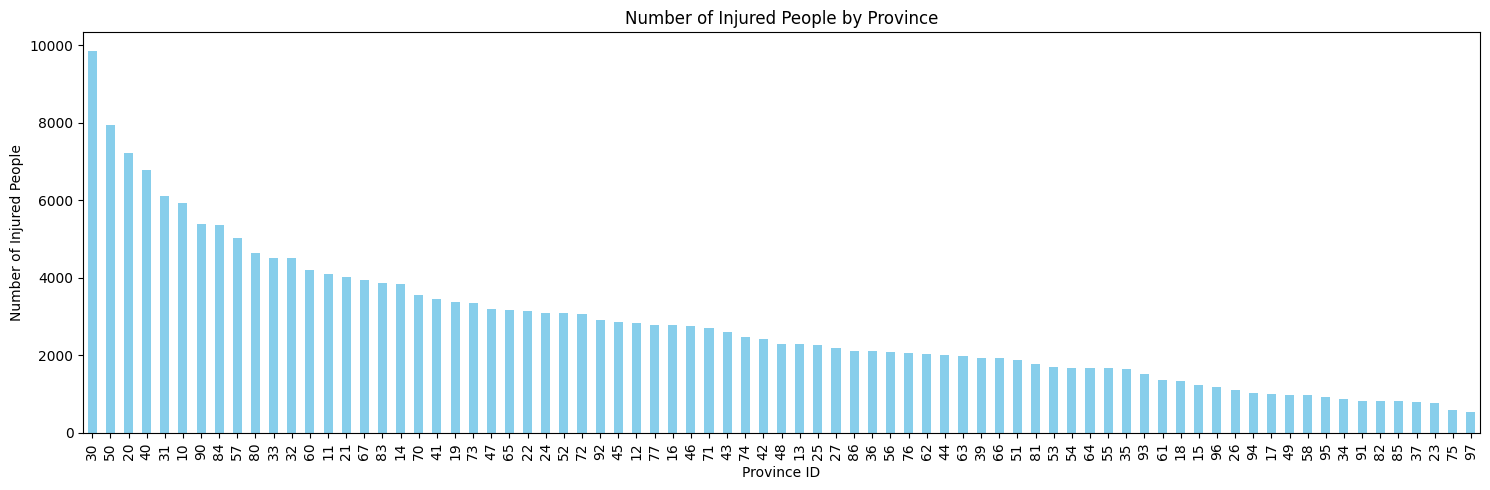

In [120]:
plt.figure(figsize=(15,5))
province.plot(kind="bar", color="skyblue")
plt.title("Number of Injured People by Province")
plt.xlabel("Province ID")
plt.ylabel("Number of Injured People")
plt.tight_layout()
plt.show()

### **5.2 Seaborn**
> เป็นไลบรารีที่สร้างขึ้นบน Matplotlib ช่วยให้สร้างและจัดการรูปแบบกราฟได้ง่ายขึ้น เหมาะสำหรับการทำ Statistical Visualization

In [121]:
import seaborn as sns

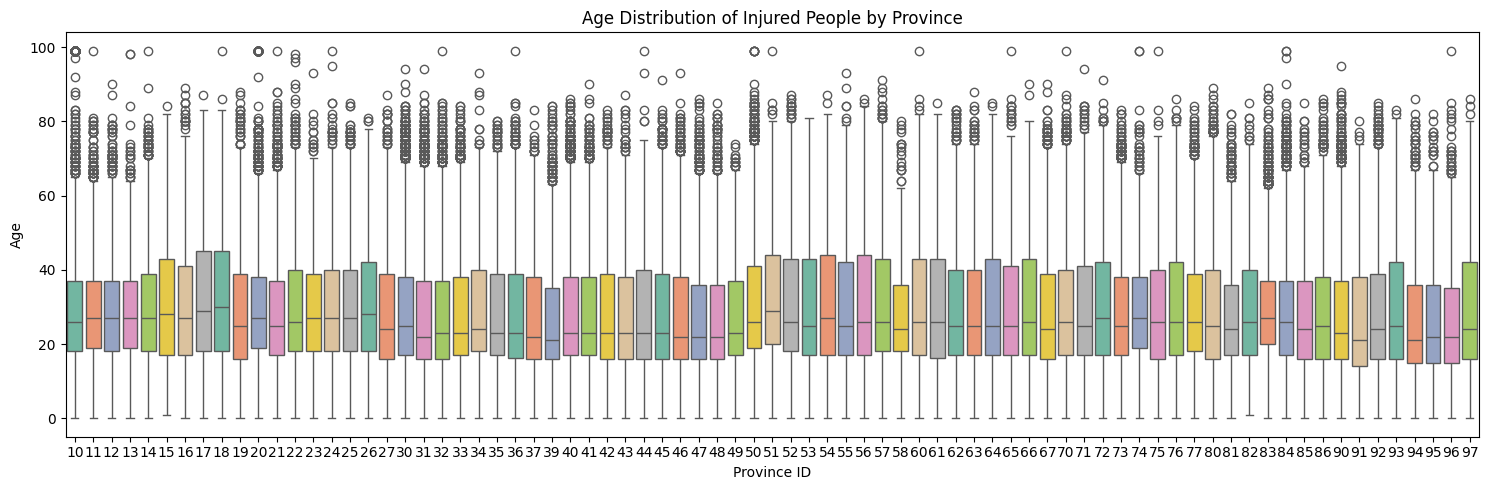

In [122]:
plt.figure(figsize=(15,5))
sns.boxplot(x="prov_id", y="age", data=pandas_df, hue="prov_id", palette="Set2", legend=False)
plt.title("Age Distribution of Injured People by Province")
plt.xlabel("Province ID")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

### **5.3 Plotly**
> เป็นไลบรารีที่ช่วยในการสร้างกราฟแบบ interactive สามารถคลิกและซูมได้

In [123]:
import plotly.express as px

> `.head(5000)` คือการกำหนดให้ใช้ข้อมูล 5000 rows แรกของ Pandas DataFrame

In [124]:
fig = px.bar(pandas_df.head(5000), x="prov", y="age", color="prov")
fig.update_layout(
    title="Age Distribution of Injured People by Province",
    xaxis_title="Province",
    yaxis_title="Number of Injured People",
)
fig.show()